In [65]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "cm",
      "font.size" : "12",
      "figure.figsize" : [8,8]}
plt.rcParams.update(rc)

%config InlineBackend.figure_format='retina'

In [66]:
mu, sigma = 1, 0.2 #parameters of the gaussian
N = int(1e3) #samples
dist = norm(mu, sigma)
tries = dist.rvs(N)

# Part 1

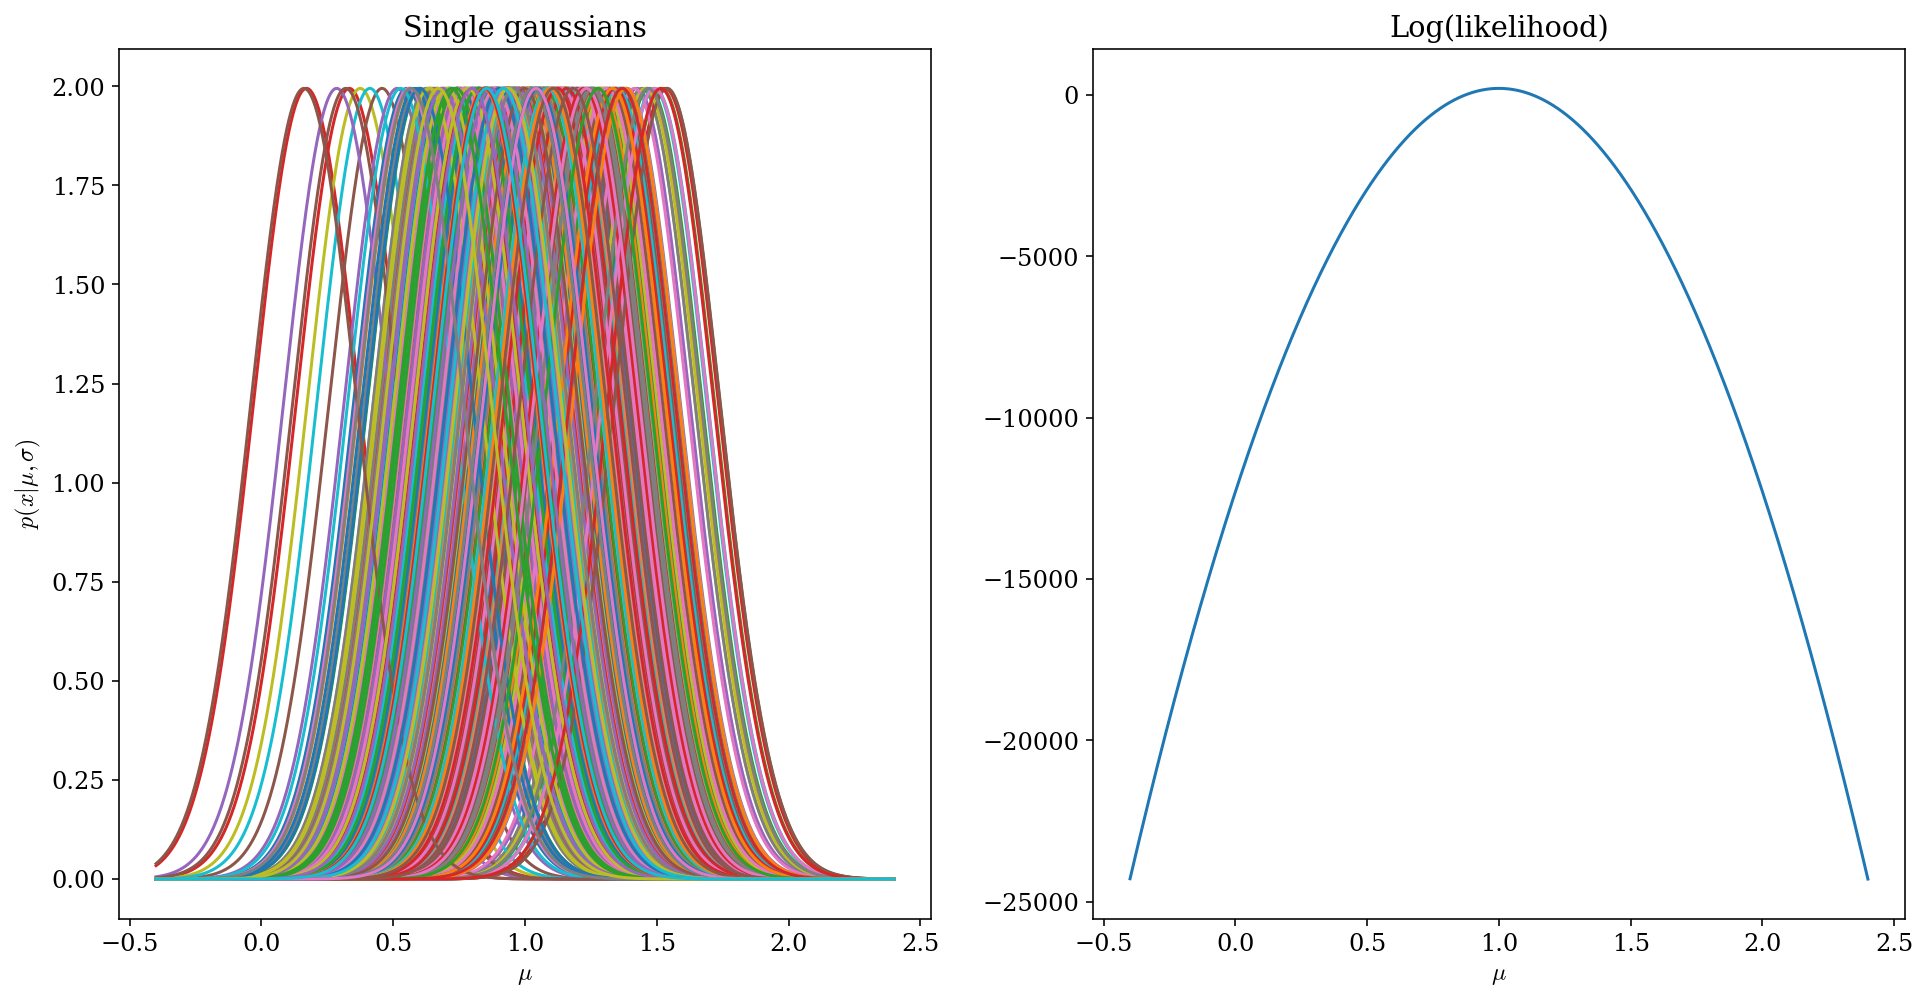

In [82]:
fig, ax = plt.subplots(1, 2, figsize = [16, 8])
x_grid = np.linspace(mu - 7*sigma, mu + 7*sigma, 10000)
L = 0 #loglikelihood
for mu_try in tries:
    dist_try = norm(mu_try, sigma)
    L += np.log(dist_try.pdf(x_grid))
    ax[0].plot(x_grid, dist_try.pdf(x_grid))
    
ax[0].set_title('Single gaussians')
ax[0].set_xlabel(r'$\mu$')
ax[0].set_ylabel(r'$p(x|\mu, \sigma)$')

ax[1].plot(x_grid, L)
ax[1].set_title('Log(likelihood)')
ax[1].set_xlabel(r'$\mu$')
plt.show()

In [68]:
max_L = x_grid[np.argmax(L)] #maximum likelihood estimator
mean =  np.mean(tries) #mean of the samples
print('The numerical best estimator is {:.4f}, the analytical mean is {:.4f}'.format(max_L, mean))

The numerical best estimator is 0.9999, the analytical mean is 0.9999


if we define $t = \frac{|\hat{\mu}_{ML} - \bar{x}|}{\sigma}$:

In [69]:
t = np.abs(max_L - mean) / sigma
print('t = {:.5f}'.format(t))

t = 0.00002


# Part 2

In [70]:
#I order, should be zero
np.diff(L)[np.argmax(L)]

-0.0010074880259764996

In [71]:
#II order
II_der = np.diff(L, n = 2)[np.argmax(L)] / (x_grid[1] - x_grid[0])**2
sigma_L = np.sqrt(-1 / II_der)
sigma_mean = sigma / np.sqrt(N)
print('the numerical best estimator for sigma is {:.4f}, the analytical sigma is {:.4f}'.format(sigma_L, sigma_mean))

the numerical best estimator for sigma is 0.0063, the analytical sigma is 0.0063


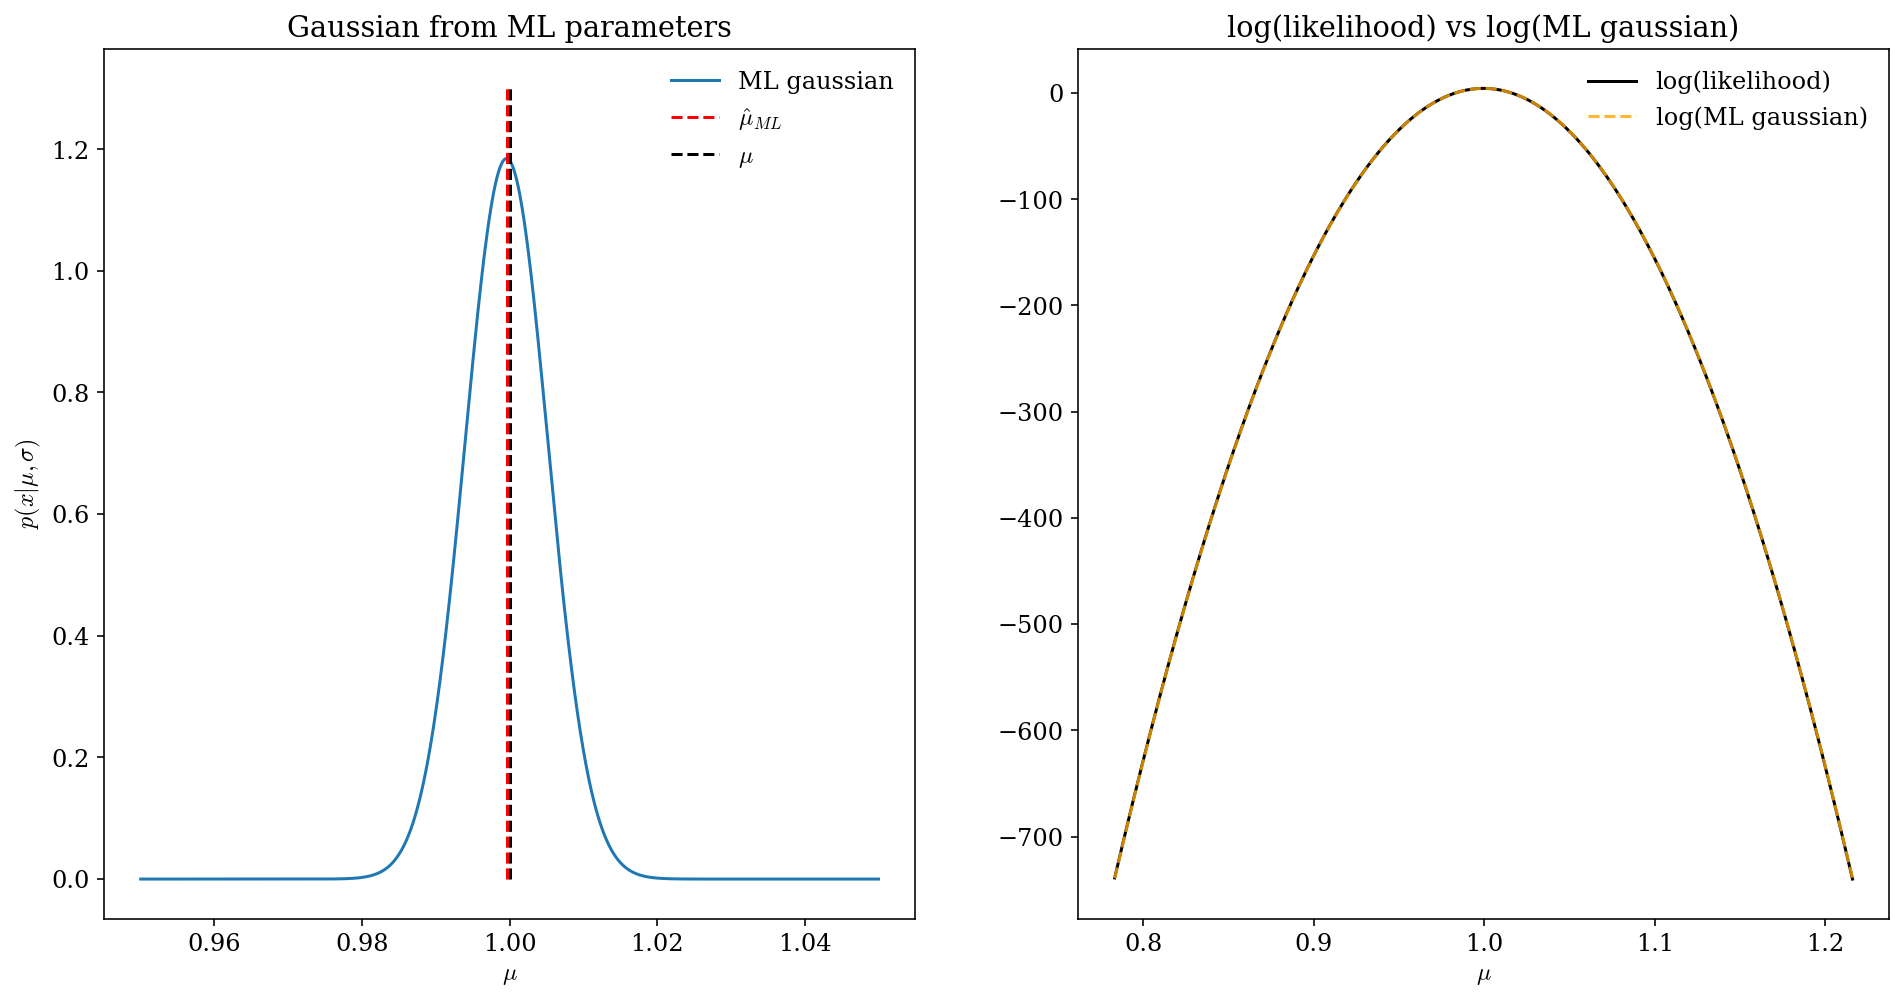

In [87]:
fig, axs = plt.subplots(1, 2, figsize = [16, 8])
distr_L = norm(max_L, sigma_L)
new_x = np.linspace(0.95, 1.05, 1000)

axs[0].plot(new_x, distr_L.pdf(new_x) / 60, label = 'ML gaussian')
axs[0].vlines(max_L, 0, 1.3, color = 'r', ls = '--', label = r'$\hat{\mu}_{ML}}$')
axs[0].vlines(mu, 0, 1.3, color = 'k', ls = '--', label = r'$\mu$')
axs[0].set_title('Gaussian from ML parameters')
axs[0].set_xlabel(r'$\mu$')
axs[0].set_ylabel(r'$p(x|\mu, \sigma)$')
axs[0].legend(frameon = False)

#overplot the likelihood
shift = L.max() - np.log(distr_L.pdf(x_grid)[distr_L.pdf(x_grid) != 0]).max()
axs[1].plot(x_grid[distr_L.pdf(x_grid) != 0], L[distr_L.pdf(x_grid) != 0] - shift, c = 'k', label = 'log(likelihood)')
axs[1].plot(x_grid[distr_L.pdf(x_grid) != 0], np.log(distr_L.pdf(x_grid)[distr_L.pdf(x_grid) != 0]), c = 'orange', ls = '--', alpha = 0.8, label = 'log(ML gaussian)')
axs[1].set_title('log(likelihood) vs log(ML gaussian)')
axs[1].set_xlabel(r'$\mu$')
axs[1].legend(frameon = False)

plt.show()

# Part 3

In [73]:
sigma_sigma = 0.05
dist_sigma = norm(sigma, sigma_sigma)
sigma_tries = dist_sigma.rvs(N)

## Part 3.1

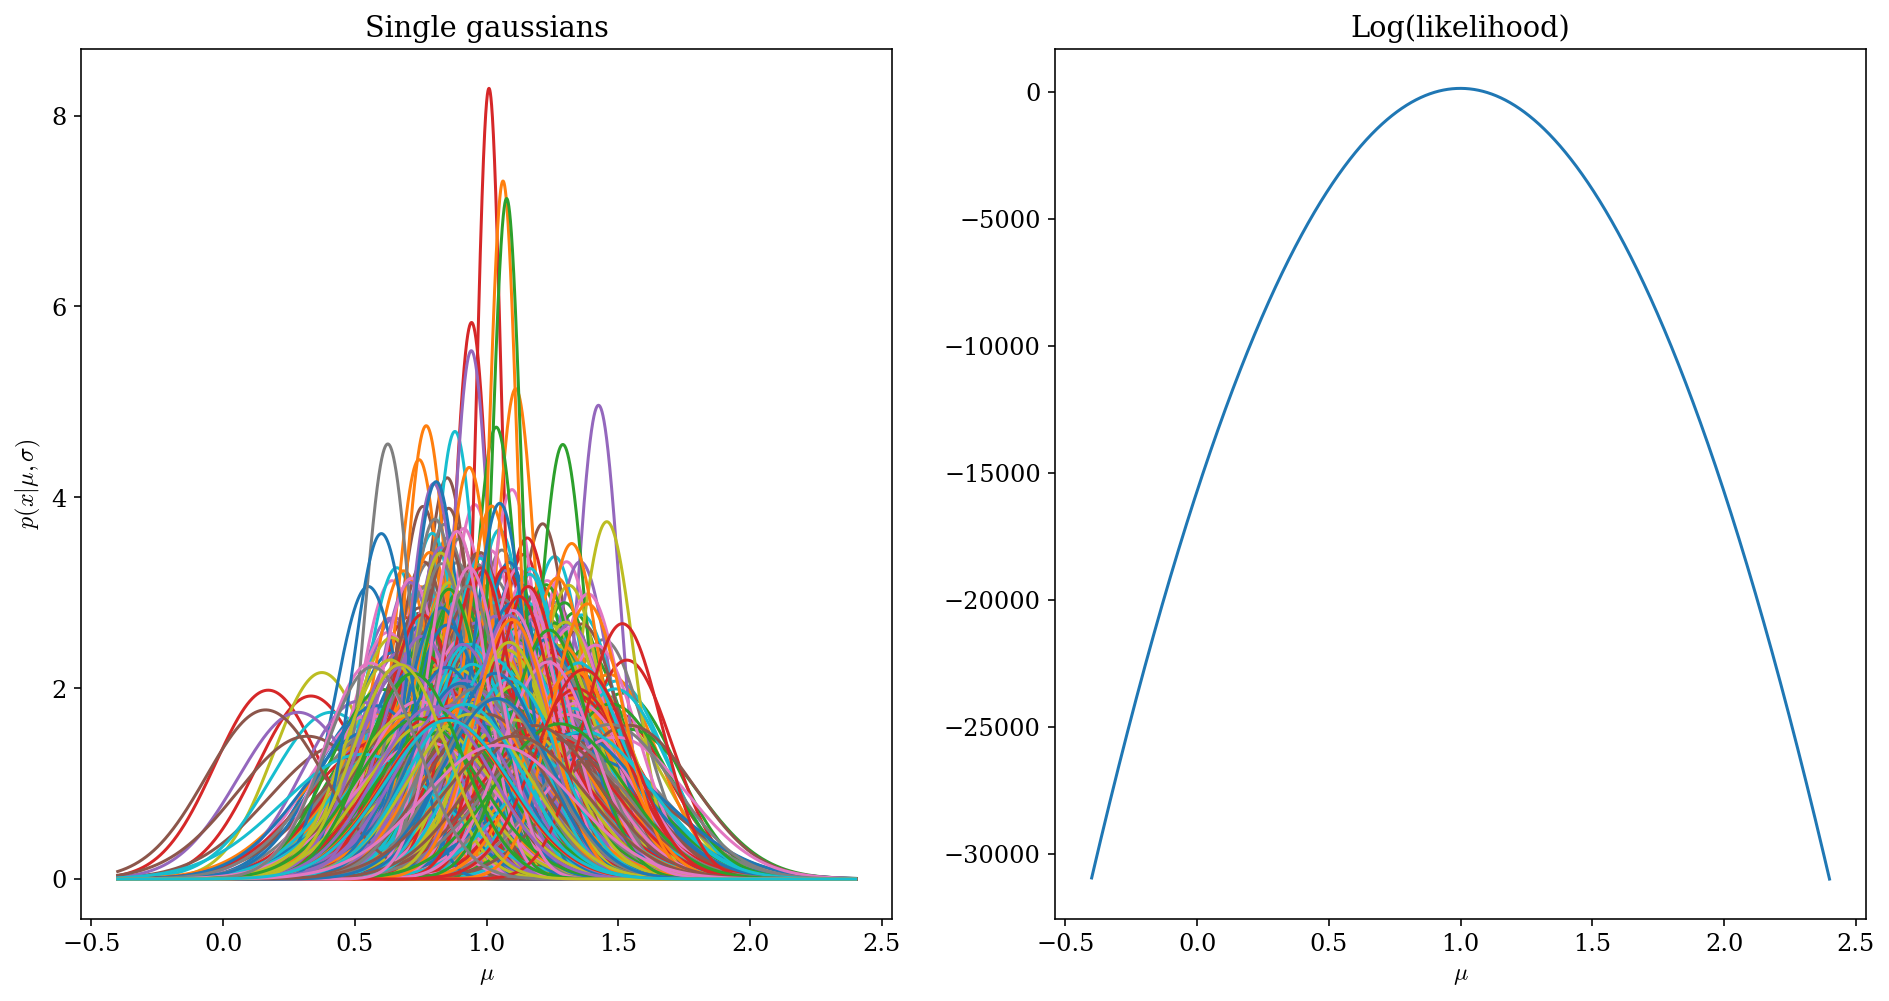

In [83]:
fig, ax = plt.subplots(1, 2, figsize = [16, 8])
L = np.zeros_like(x_grid)
for mu_try, sigma_try in zip(tries, sigma_tries):
    dist_try = norm(mu_try, sigma_try)
    L = L[dist_try.pdf(x_grid) != 0]
    x_grid = x_grid[dist_try.pdf(x_grid) != 0]
    L += np.log(dist_try.pdf(x_grid))
    ax[0].plot(x_grid, dist_try.pdf(x_grid))
    
ax[0].set_title('Single gaussians')
ax[0].set_xlabel(r'$\mu$')
ax[0].set_ylabel(r'$p(x|\mu, \sigma)$')

ax[1].plot(x_grid, L)
ax[1].set_title('Log(likelihood)')
ax[1].set_xlabel(r'$\mu$')
plt.show()

In [75]:
max_L = x_grid[np.argmax(L)]
mean =  np.mean(tries)
print('The numerical best estimator is {:.4f}, the analytical mean is {:.4f}'.format(max_L, mean))

The numerical best estimator is 0.9996, the analytical mean is 0.9999


In [76]:
t = np.abs(max_L - mean) / sigma
print('t = {:.5f}'.format(t))

t = 0.00138


Of course now a simple mean fails. Wehave to use a weighted mean:

In [77]:
w_mean = np.mean(tries / sigma_tries**2) / np.mean(1 / sigma_tries**2)
print('The numerical best estimator is {:.4f}, the analytical weighted mean is {:.4f}'.format(max_L, w_mean))

The numerical best estimator is 0.9996, the analytical weighted mean is 0.9995


In [78]:
t = np.abs(max_L - w_mean) / sigma
print('t = {:.5f}'.format(t))

t = 0.00039


## Part 3.2

In [79]:
#I order, should be zero
np.diff(L)[np.argmax(L)]

-0.0019426212641633356

In [80]:
#II order derivative in 
II_der = np.diff(L, n = 2)[np.argmax(L)] / (x_grid[1] - x_grid[0])**2
sigma_L = np.sqrt(-1 / II_der)
sigma_mean = 1 / np.sqrt(np.sum(1 / sigma_tries**2))
print('the numerical best estimator for sigma is {:.4f}, the analytical sigma is {:.4f}'.format(sigma_L, sigma_mean))

the numerical best estimator for sigma is 0.0056, the analytical sigma is 0.0056


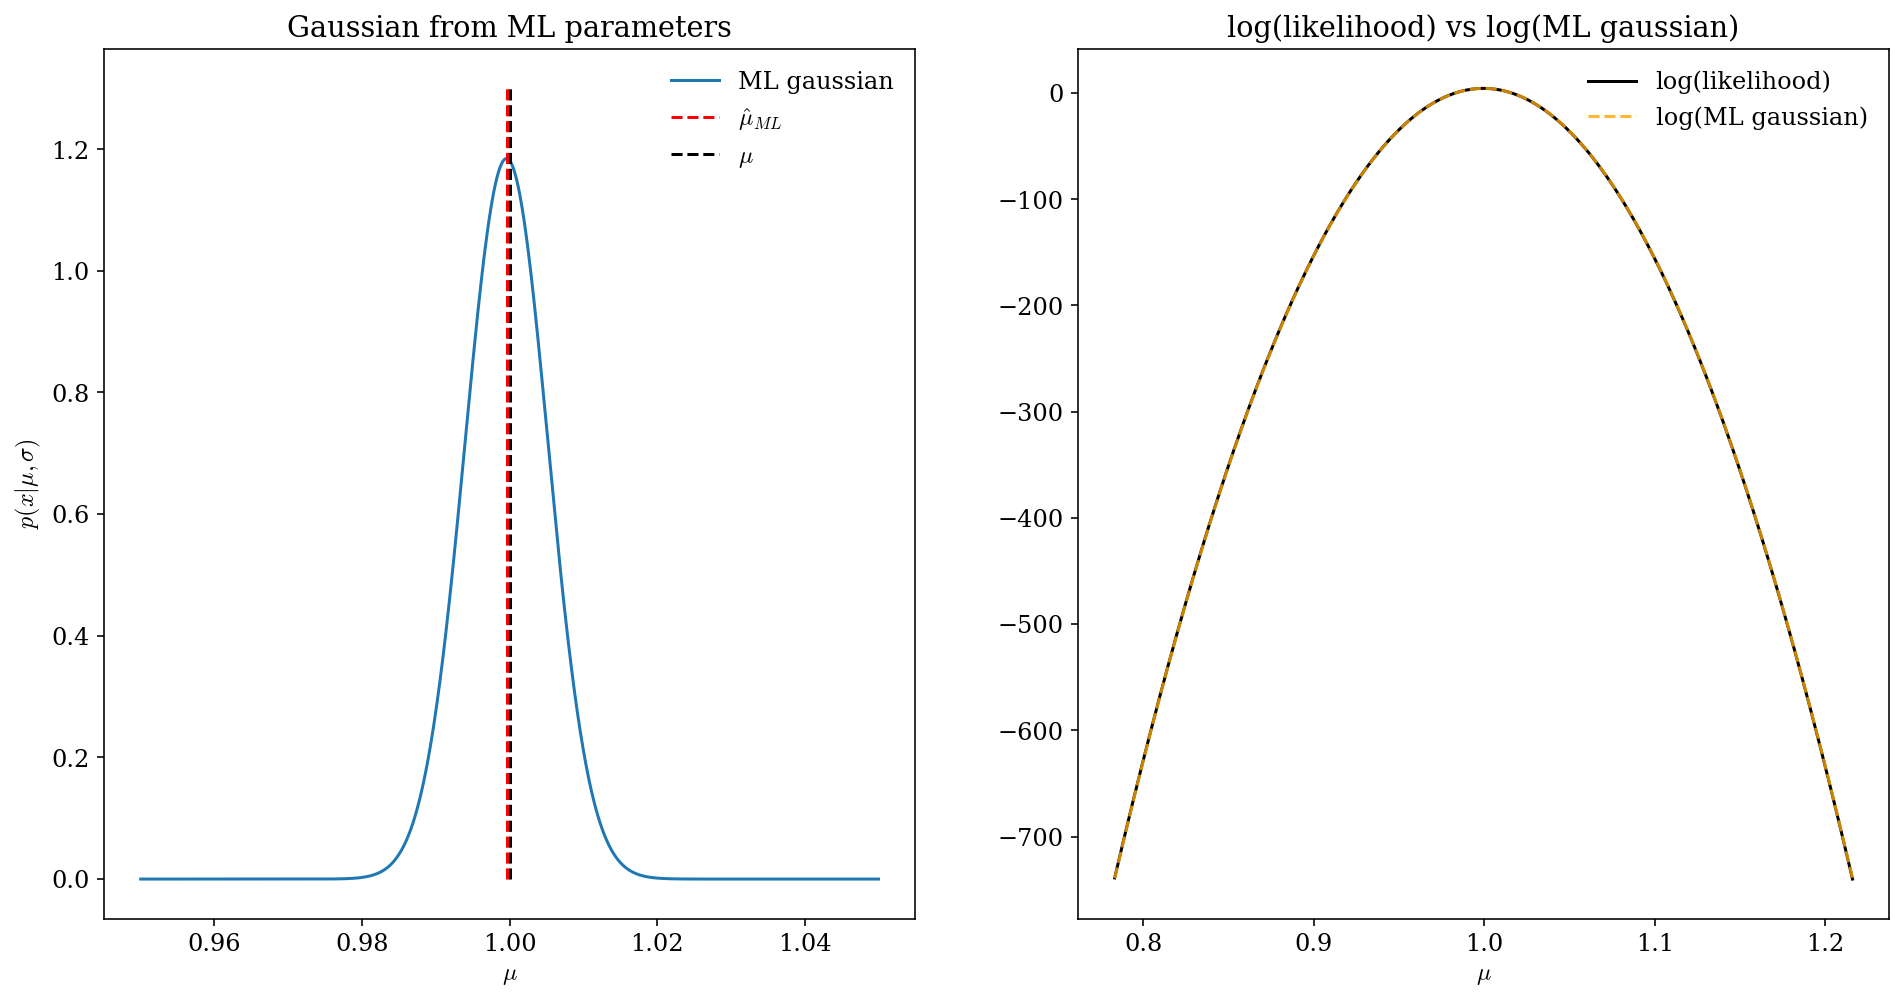

In [85]:
fig, axs = plt.subplots(1, 2, figsize = [16, 8])
distr_L = norm(max_L, sigma_L)
new_x = np.linspace(0.95, 1.05, 1000)

axs[0].plot(new_x, distr_L.pdf(new_x) / 60, label = 'ML gaussian')
axs[0].vlines(max_L, 0, 1.3, color = 'r', ls = '--', label = r'$\hat{\mu}_{ML}}$')
axs[0].vlines(mu, 0, 1.3, color = 'k', ls = '--', label = r'$\mu$')
axs[0].set_title('Gaussian from ML parameters')
axs[0].set_xlabel(r'$\mu$')
axs[0].set_ylabel(r'$p(x|\mu, \sigma)$')
axs[0].legend(frameon = False)

#overplot the likelihood
shift = L.max() - np.log(distr_L.pdf(x_grid)[distr_L.pdf(x_grid) != 0]).max()
axs[1].plot(x_grid[distr_L.pdf(x_grid) != 0], L[distr_L.pdf(x_grid) != 0] - shift, c = 'k', label = 'log(likelihood)')
axs[1].plot(x_grid[distr_L.pdf(x_grid) != 0], np.log(distr_L.pdf(x_grid)[distr_L.pdf(x_grid) != 0]), c = 'orange', ls = '--', alpha = 0.8, label = 'log(ML gaussian)')
axs[1].set_title('log(likelihood) vs log(ML gaussian)')
axs[1].set_xlabel(r'$\mu$')
axs[1].legend(frameon = False)

plt.show()